<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/Homework_1_Student_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [ ]:
!pip install scikit-plot

In [ ]:
!pip install scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2



## Load Dataset

In [ ]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): Apache 2.0
 85% 56.0M/66.0M [00:00<00:00, 71.9MB/s]
100% 66.0M/66.0M [00:00<00:00, 74.9MB/s]


In [ ]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

## Summary Statistics for the Dataset


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Visualize Distribution of Classes

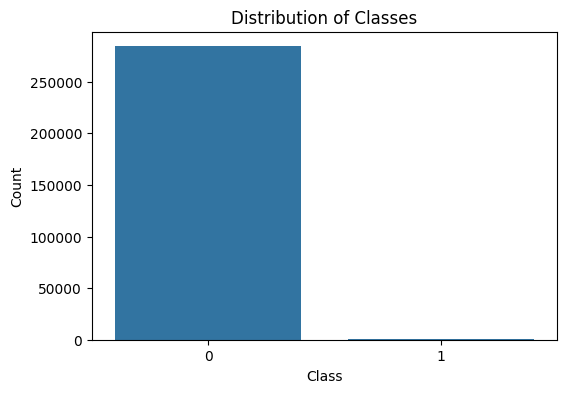

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Display the class distribution in percentages

In [ ]:
# Calculate class distribution
class_distribution = df['Class'].value_counts(normalize=True) * 100  # Get percentages

# Display the class distribution in percentage
print(class_distribution)

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


## Compute the correlation matrix

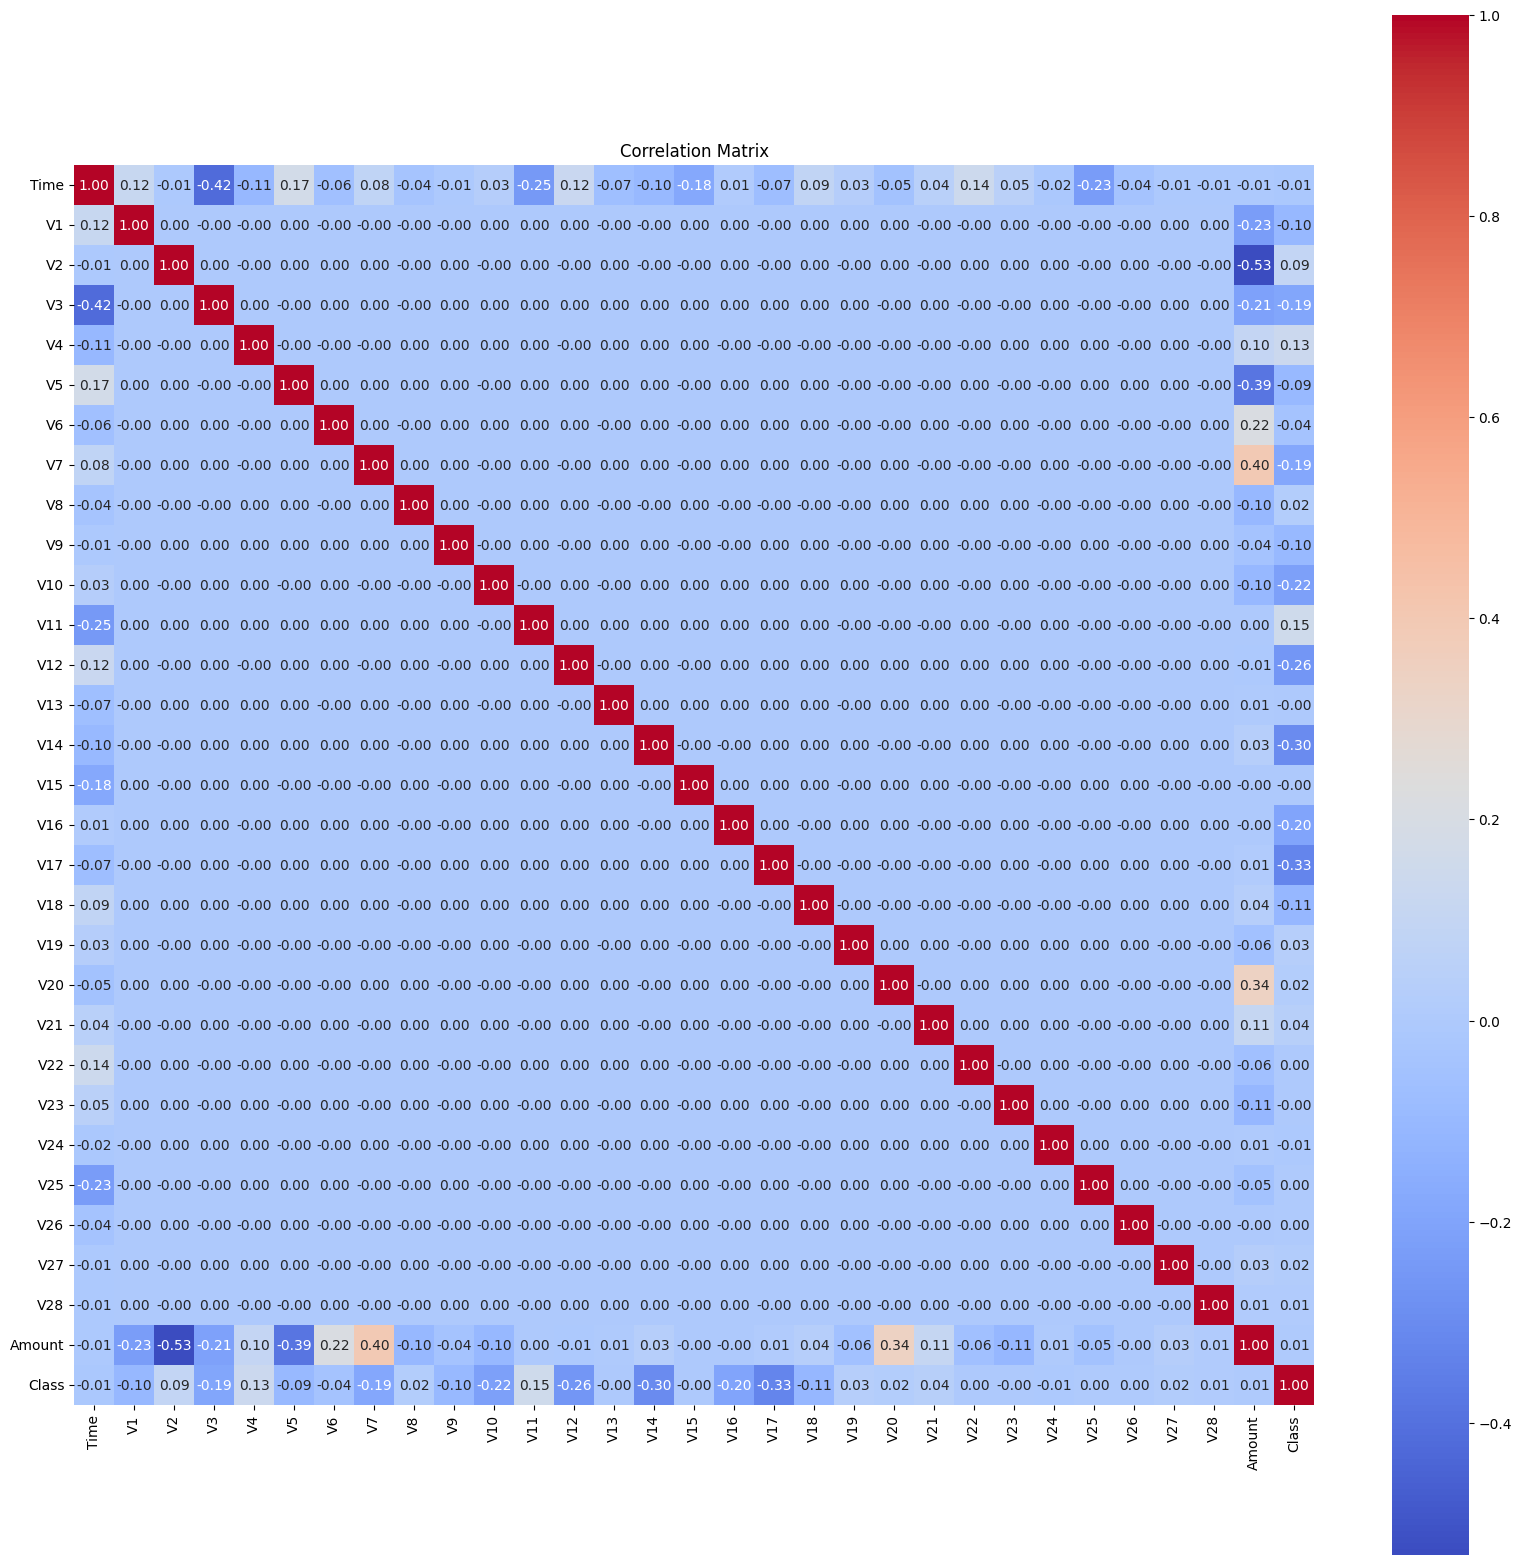

In [ ]:
# Check correlation matrix
plt.figure(figsize=(20, 20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Plot the Distribution of Some Selected Features

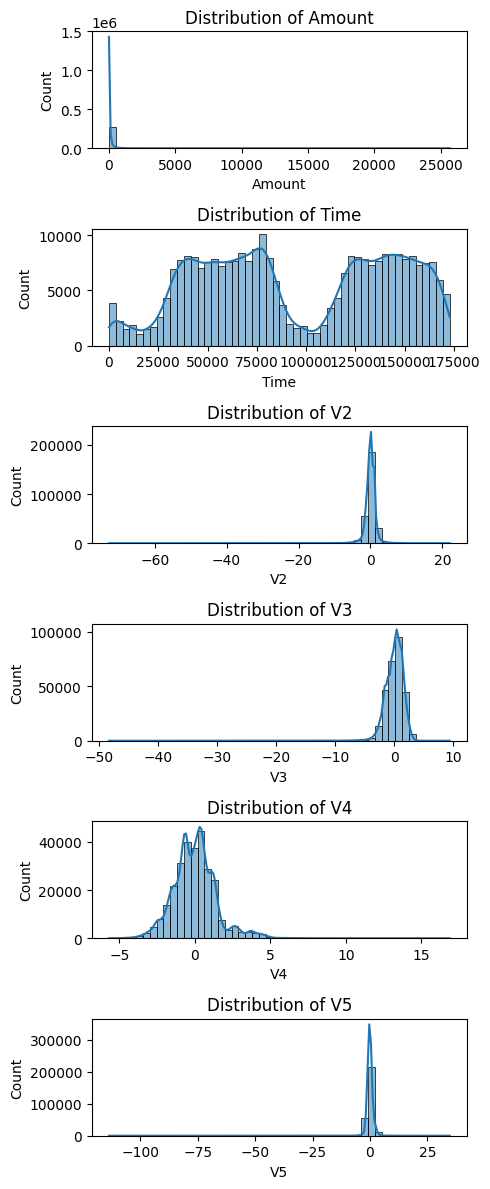

In [ ]:
# List of features to plot
selected_features = ['Amount', 'Time', 'V2', 'V3', 'V4', 'V5']

# Set the figure size with a more balanced width and height
plt.figure(figsize=(5, 12))  # Adjust width to 8 and height to 12 for better proportions
for i, feature in enumerate(selected_features):
    plt.subplot(len(selected_features), 1, i + 1)  # len(selected_features) rows, 1 column
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()
plt.show()

## Additional Analysis

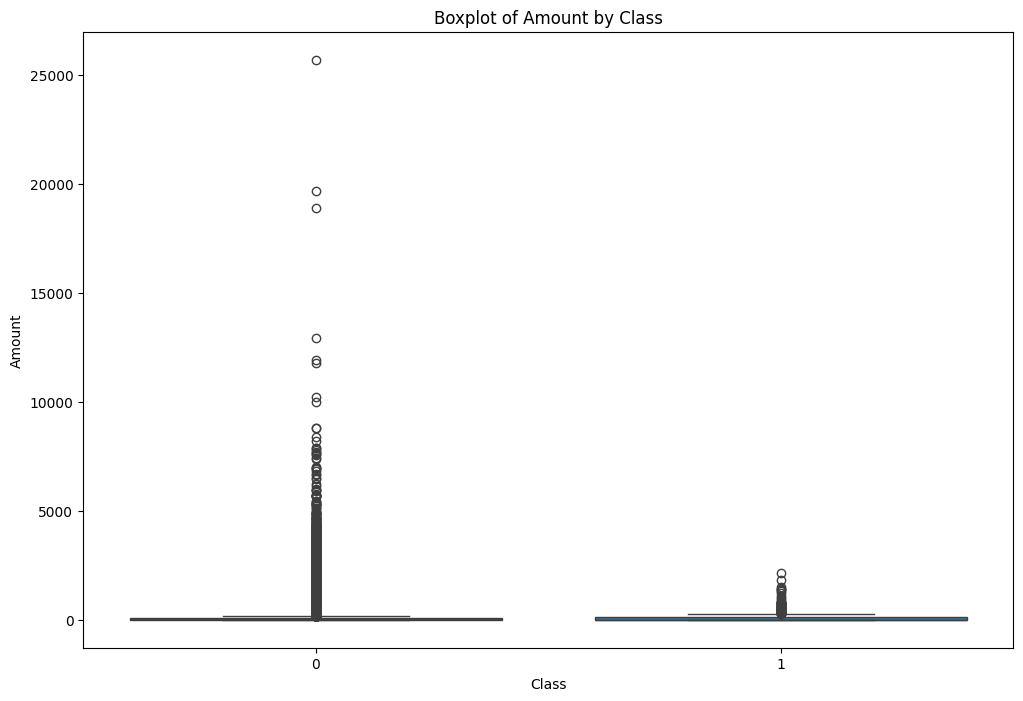

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

### Outlier Detection

## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.
2. Analyze the correlation matrix of the features.
3. Is your data linearly separable? Please provide a rationale.

  **Student Answer:**  .......

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


In [ ]:
######################################################
###################### TO DO #########################
######################################################
pass
######################################################
######################################################
######################################################

In [ ]:
######################################################
###################### TO DO #########################
######################################################
pass
######################################################
######################################################
######################################################

In [ ]:
##########################################################
#You can add more creative preprocessing to learn more...#
##########################################################
pass
##########################################################
##########################################################
##########################################################

## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








### Logistic Regression

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.63      0.70       136

    accuracy                           1.00     85443
   macro avg       0.89      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Logistic Regression Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

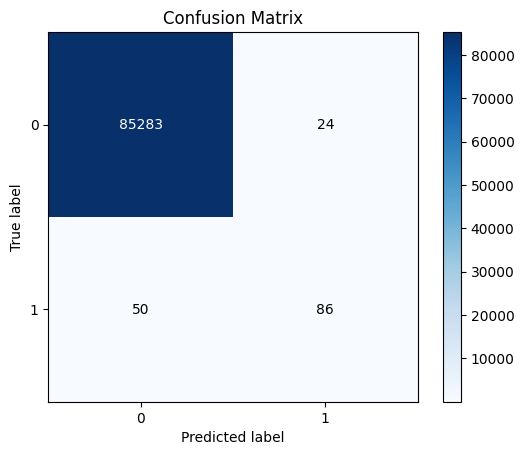

In [ ]:
######################################################
###################### TO DO #########################
######################################################
pass
######################################################
######################################################
######################################################


In [ ]:
##################################### TO DO #######################################
## Feel free to add more cells and employ creative ideas to enhance performance. ##
###################################################################################
pass
###################################################################################
###################################################################################
###################################################################################

### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.91      0.68      0.78       136

    accuracy                           1.00     85443
   macro avg       0.96      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443

SVM Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

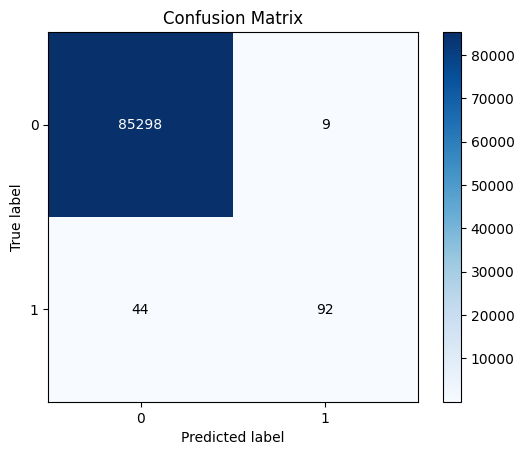

In [ ]:
######################################################
###################### TO DO #########################
######################################################
pass
######################################################
######################################################
######################################################

In [ ]:
##################################### TO DO #######################################
## Feel free to add more cells and employ creative ideas to enhance performance. ##
###################################################################################
pass
###################################################################################
###################################################################################
###################################################################################


## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

  **Student Answer:**  .......

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

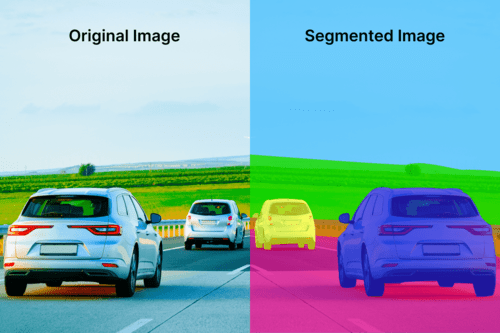

## Load Data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg
100% 36.2k/36.2k [00:00<00:00, 66.7MB/s]


In [ ]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


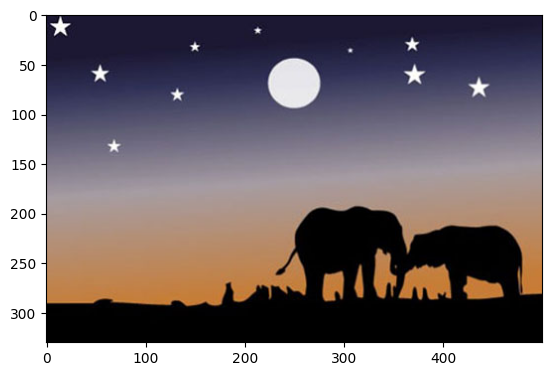

In [ ]:
plt.imshow(im) # as RGB Format
plt.show()

In [ ]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








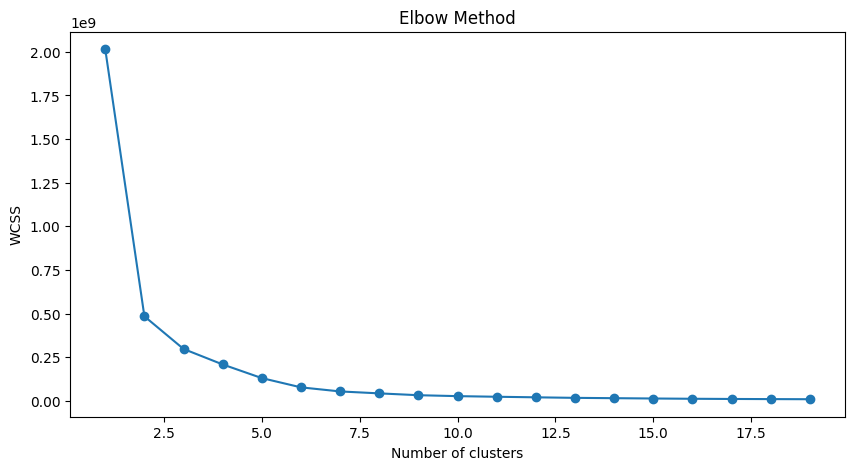

In [ ]:
# Elbow Method or # Silhouette Score
######################################################
###################### TO DO #########################
######################################################
pass # The optimal number of clusters when clustering all pixels represents the predominant colors in an image.
######################################################
######################################################
######################################################


## Visualize Dominant Color

In [ ]:
# Now that you have the number of dominant colors (clusters),
# use clustering to determine the cluster of each pixel.
######################################################
###################### TO DO #########################
######################################################
dominant_colors = None
kmeans = None
pass
######################################################
######################################################
######################################################
kmeans.fit(all_pixels)

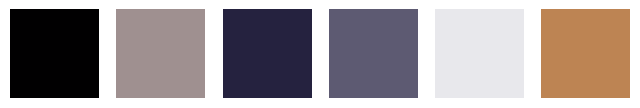

In [ ]:
#######Plot the each of dominant color as image#######
####### Dominant colors are center of cluster ########
###################### TO DO #########################
pass
######################################################
######################################################
######################################################

## Segmenting original image

In [ ]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


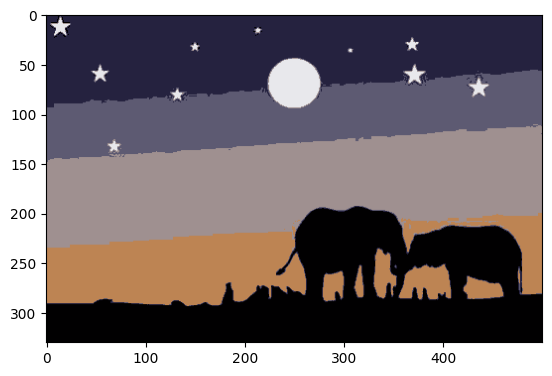

In [ ]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()